# Imports

In [1]:
from numpy.random import seed
seed(888)
from tensorflow import set_random_seed
set_random_seed(404)

C:\Users\b\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\b\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\b\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\b\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [69]:
import os
import numpy as np
import tensorflow as tf
import itertools

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

%matplotlib inline

# Constants

In [3]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

# Get the data

In [4]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()  # from the documentation

# Explor data

class : 0
type : Plane


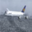

In [32]:
# the first way to explore
image_order = 199
pic = array_to_img(x_train_all[image_order])
print('class :', y_train_all[image_order][0])
print('type :', LABEL_NAMES[y_train_all[image_order][0]])
display(pic)

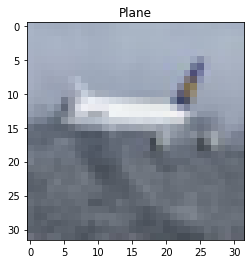

In [33]:
# the second way to explore
plt.imshow(x_train_all[image_order])
plt.title(LABEL_NAMES[y_train_all[image_order][0]])
plt.show()

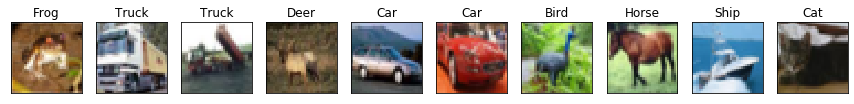

In [41]:
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(1, 10, i+1)  # 1, row, column
    plt.imshow(x_train_all[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(LABEL_NAMES[y_train_all[i][0]])
plt.show()

In [42]:
x_train_all.shape  # we got 50000 picture, with 32*32 pixel and 3 channel per pixel

(50000, 32, 32, 3)

# Preprocess Data

In [47]:
x_train_all[0]  # overview picture level
x_train_all[0][0]  # overvire pixel level
x_train_all[0][0][0]  # each pixel color 
x_train_all[0][0][0][0]  # each color in the pixel >> 0-2

0.23137254901960785

In [5]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0  
# What we will get if we divide it with maximun value of RGB
# first >> smaller number >> get range 0 - 1
#### because of learning rate, it's very small
#### so If the number is small, it will be easy to calculate the loss and adjusing the weight
# second >> get float

In [6]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)
x_test = x_test.reshape(x_test.shape[0], TOTAL_INPUTS)
x_train_all.shape

(50000, 3072)

## Create Validation Dataset

In [38]:
x_validation = x_train_all[:VALIDATION_SIZE]
y_validation = y_train_all[:VALIDATION_SIZE]
print('x_validation\' shape :', x_validation.shape)
print('y_validation\' shape :', y_validation.shape)

x_validation' shape : (10000, 3072)
y_validation' shape : (10000, 1)


In [8]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
print('x_train\' shape :', x_train.shape)
print('y_train\' shape :', y_train.shape)

x_train' shape : (40000, 3072)
y_train' shape : (40000, 1)


In [9]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]
print('x_train_xs\' shape :', x_train_xs.shape)
print('y_train_xs\' shape :', y_train_xs.shape)

x_train_xs' shape : (1000, 3072)
y_train_xs' shape : (1000, 1)


# Defin the Meural Network using Keras

In [26]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_fh'),  # first hidden layer
    Dense(units=64, activation='relu', name='m1_sh'),  # second hidden layer
    Dense(units=16, activation='relu', name='m1_th'),  # third hidden layer
    Dense(units=10, activation='softmax', name='m1_o'),  # output layer
])

model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [27]:
# model_1.summary()

In [28]:
model_2 = Sequential([
    Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)),  # dropout on input layer
    Dense(units=128, activation='relu', name='m2_fh'),  # first hidden layer
    Dense(units=64, activation='relu', name='m2_sh'),  # second hidden layer
    Dense(units=16, activation='relu', name='m2_th'),  # third hidden layer
    Dense(units=10, activation='softmax', name='m2_o'),  # output layer
])

model_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [29]:
model_3 = Sequential([
    Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)),  # dropout on input layer
    Dense(units=128, activation='relu', name='m3_fh'),  # first hidden layer
    Dropout(0.25, seed=42),  # dropout on first hidden layer
    Dense(units=64, activation='relu', name='m3_sh'),  # second hidden layer
    Dense(units=16, activation='relu', name='m3_th'),  # third hidden layer
    Dense(units=10, activation='softmax', name='m3_o'),  # output layer
])

model_3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [19]:
# between input and first hidden layer
TOTAL_INPUTS * 128 - 393344  # the last one we get from funtion

-128

In [21]:
# between first and second hidden layer
128*64 - 8256

-64

In [22]:
# between second and third hidden layer
64*16 - 1040

-16

In [23]:
16*10 - 170

-10

# Tensorboard (visualising leaning)

In [13]:
def get_tensorboard(model_name):
    folder_name = f'{model_name} at T{strftime("%H %M")}'
    dir_path = os.path.join(LOG_DIR, folder_name)
    try:
        os.makedirs(dir_path)
    except OSError as err:
        print(err)
    else:
        print('Succesfully create folder')
    
    return TensorBoard(log_dir=dir_path)

# Fit the Model

In [14]:
%%time
model_1.fit(x_train_xs, y_train_xs, callbacks=[get_tensorboard('model_1')])  # which got low accuracy

Succesfully create folder
Epoch 1/1
1000/1000 [==============================] - 0s 152us/step - loss: 4.9076 - accuracy: 0.3150
Wall time: 879 ms


In [27]:
%%time
# with epoch batch_size
epoch_number = 100
batch_size = 1000
model_1.fit(x_train_xs, y_train_xs, batch_size=batch_size, epochs=epoch_number,
            callbacks=[get_tensorboard('model_1')],  # which got higher accuracy
            verbose=0)  # not to display the output

Succesfully create folder
Wall time: 8.37 s


In [24]:
%%time
# with epoch batch_size and validation
epoch_number = 100
batch_size = 1000
model_1.fit(x_train_xs, y_train_xs, batch_size=batch_size, epochs=epoch_number,
            callbacks=[get_tensorboard('model_1')],  # which got higher accuracy
            verbose=0,  # not to display the output
            validation_data=(x_validation, y_yalidation))

Succesfully create folder




Wall time: 22.8 s


In [25]:
%%time
# with epoch batch_size and validation
epoch_number = 100
batch_size = 1000
model_2.fit(x_train_xs, y_train_xs, batch_size=batch_size, epochs=epoch_number,
            callbacks=[get_tensorboard('model_2')],  # which got higher accuracy
            verbose=0,  # not to display the output
            validation_data=(x_validation, y_yalidation))

Succesfully create folder
Wall time: 21.9 s


## Let do with Bigger Dataset

In [30]:
%%time
# with epoch batch_size and validation
epoch_number = 100
batch_size = 1000
model_1.fit(x_train, y_train, batch_size=batch_size, epochs=epoch_number,
            callbacks=[get_tensorboard('model_1_xs')],
            verbose=0,  # not to display the output
            validation_data=(x_validation, y_validation))

Succesfully create folder
Wall time: 2min


In [31]:
%%time
# with epoch batch_size and validation
epoch_number = 100
batch_size = 1000
model_2.fit(x_train, y_train, batch_size=batch_size, epochs=epoch_number,
            callbacks=[get_tensorboard('model_2_xs')],
            verbose=0,  # not to display the output
            validation_data=(x_validation, y_validation))

Succesfully create folder
Wall time: 3min 17s


In [32]:
%%time
# with epoch batch_size and validation
epoch_number = 100
batch_size = 1000
model_3.fit(x_train, y_train, batch_size=batch_size, epochs=epoch_number,
            callbacks=[get_tensorboard('model_3_xs')],
            verbose=0,  # not to display the output
            validation_data=(x_validation, y_validation))

Succesfully create folder
Wall time: 3min 19s


# Prediction on Individual Image

In [23]:
print(x_validation.shape)
print(x_validation[0])
test = np.expand_dims(x_validation[0], axis=0)
print(test.shape)

(10000, 3072)
[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]
(1, 3072)


In [34]:
np.set_printoptions(precision=3)  # print only 3 decimal point
model_2.predict(test)

array([[1.078e-02, 4.336e-03, 3.472e-02, 1.886e-01, 7.165e-02, 1.547e-01,
        4.952e-01, 3.792e-02, 1.825e-04, 1.919e-03]], dtype=float32)

In [35]:
model_2.predict(x_validation)

array([[1.078e-02, 4.336e-03, 3.472e-02, ..., 3.792e-02, 1.825e-04,
        1.919e-03],
       [4.046e-03, 5.656e-01, 6.990e-04, ..., 1.651e-03, 9.401e-02,
        3.301e-01],
       [9.480e-03, 2.632e-02, 3.461e-03, ..., 2.571e-02, 3.504e-02,
        8.795e-01],
       ...,
       [2.849e-02, 3.616e-01, 1.526e-03, ..., 1.706e-02, 1.356e-01,
        4.335e-01],
       [1.927e-02, 6.124e-01, 5.775e-02, ..., 5.927e-02, 1.614e-02,
        1.248e-01],
       [3.405e-03, 1.326e-04, 7.647e-02, ..., 5.766e-01, 9.681e-05,
        6.085e-04]], dtype=float32)

In [36]:
model_2.predict_classes(test)

array([6], dtype=int64)

In [37]:
y_yalidation[0]  # predict correctly

array([6], dtype=uint8)

In [45]:
for i in range(10):
    data = np.expand_dims(x_validation[i], axis=0)
    print('predicted class :', model_2.predict_classes(data))
    print('actual class    :', y_validation[i], '  ', model_2.predict_classes(data)[0]==y_validation[i][0])

predicted class : [6]
actual class    : [6]    True
predicted class : [1]
actual class    : [9]    False
predicted class : [9]
actual class    : [9]    True
predicted class : [6]
actual class    : [4]    False
predicted class : [1]
actual class    : [1]    True
predicted class : [9]
actual class    : [1]    False
predicted class : [4]
actual class    : [2]    False
predicted class : [7]
actual class    : [7]    True
predicted class : [8]
actual class    : [8]    True
predicted class : [9]
actual class    : [3]    False


# Evaluation

In [46]:
model_2.metrics_names

['loss', 'accuracy']

In [49]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print('Test loss is {:.03f}\ntest accuracy is {:.03f}'.format(test_loss, test_accuracy))

10000/10000 [==============================] - 0s 33us/step
Test loss is 1.433
test accuracy is 0.498


# Confusion Matrix

In [74]:
predictions = model_2.predict_classes(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

In [75]:
conf_matrix

array([[495,  30, 102,  35,  35,  17,  30,  33, 172,  51],
       [ 28, 570,  21,  35,  11,  14,  22,  30,  75, 194],
       [ 52,  16, 393,  96, 148,  48, 144,  61,  25,  17],
       [ 21,  17,  92, 360,  69, 159, 159,  52,  27,  44],
       [ 35,  13, 179,  58, 425,  30, 145,  76,  20,  19],
       [ 12,   8, 110, 240,  68, 330, 111,  76,  28,  17],
       [  3,  10,  81,  82, 114,  26, 630,  18,  10,  26],
       [ 36,  12,  70,  67, 100,  80,  49, 534,  14,  38],
       [ 66,  39,  30,  36,  26,  21,  13,  18, 672,  79],
       [ 37, 154,  12,  40,  12,  19,  30,  50,  74, 572]], dtype=int64)

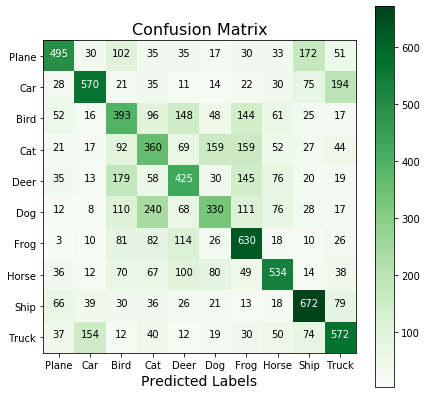

In [85]:
plt.figure(figsize=(7, 7))
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Actual Labels', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=14)

tick_marks = np.arange(len(LABEL_NAMES))
plt.xticks(tick_marks, LABEL_NAMES)
plt.yticks(tick_marks, LABEL_NAMES)

plt.colorbar()

row_number = conf_matrix.shape[0]
column_number = conf_matrix.shape[1]

for i, j in itertools.product(range(row_number), range(column_number)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center', 
             color='white' if conf_matrix[i, j] > 400 else 'black')

plt.show()
# light color = row value

In [87]:
true_positive = np.diag(conf_matrix)
true_positive

array([495, 570, 393, 360, 425, 330, 630, 534, 672, 572], dtype=int64)

In [89]:
recall_score = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall_score

array([0.495, 0.57 , 0.393, 0.36 , 0.425, 0.33 , 0.63 , 0.534, 0.672,
       0.572])

In [91]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.631, 0.656, 0.361, 0.343, 0.422, 0.444, 0.473, 0.563, 0.602,
       0.541])

In [92]:
avg_recall_score = np.mean(recall_score)
avg_precision = np.mean(precision) 
f_score = (2 * avg_precision * avg_recall_score) / (avg_precision + avg_recall_score)
print('Average recall score :', avg_recall_score)
print('Average precision score :', avg_precision)
print('f score :', f_score)

Average recall score : 0.4981
Average precision score : 0.5034084378296674
f score : 0.5007401503802477
